In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2023-04-28 13:18:56.147548: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 13:18:56.269836: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 13:18:56.272557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 13:18:58.984950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
train = pd.read_csv("data/train.csv", delimiter=",")
test = pd.read_csv("data/test.csv", delimiter=",")

In [3]:
train_data = np.array(train, dtype = 'float32')
X_test = np.array(test, dtype='float32')

In [4]:
X_train = train_data[:,1:]/255

y_train = train_data[:,0]

In [6]:
X_train.shape

(42000, 784)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 713)

In [8]:
# plt.figure(figsize=(10, 10))
# for i in range(36):
#     plt.subplot(6, 6, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((28,28)))
#     label_index = int(y_train[i])
# plt.show()

In [9]:
image_shape = (28,28,1) 

In [10]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

In [11]:
X_train.shape

(33600, 28, 28, 1)

In [12]:
# initializer = GlorotNormal()

model = keras.Sequential([
    #base
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=image_shape),
    #heatete
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [13]:
history = model.fit(
    X_train, y_train,
    batch_size=512,
    validation_split=0.33,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    epochs=50,
    verbose=1
)

Epoch 1/50
66/66 [==============================] - 17s 221ms/step - loss: 0.5770 - accuracy: 0.8443 - val_loss: 0.2361 - val_accuracy: 0.9342
Epoch 2/50
66/66 [==============================] - 15s 230ms/step - loss: 0.1927 - accuracy: 0.9456 - val_loss: 0.1552 - val_accuracy: 0.9544
Epoch 3/50
66/66 [==============================] - 13s 197ms/step - loss: 0.1226 - accuracy: 0.9664 - val_loss: 0.1102 - val_accuracy: 0.9692
Epoch 4/50
66/66 [==============================] - 16s 250ms/step - loss: 0.0862 - accuracy: 0.9765 - val_loss: 0.0884 - val_accuracy: 0.9744
Epoch 5/50
66/66 [==============================] - 14s 217ms/step - loss: 0.0632 - accuracy: 0.9829 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 6/50
66/66 [==============================] - 17s 251ms/step - loss: 0.0509 - accuracy: 0.9864 - val_loss: 0.0762 - val_accuracy: 0.9777
Epoch 7/50
66/66 [==============================] - 13s 197ms/step - loss: 0.0404 - accuracy: 0.9895 - val_loss: 0.0712 - val_accuracy: 0.9789

In [14]:
history_df = pd.DataFrame(history.history)

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
confusion = confusion_matrix(y_test, y_pred_classes)
print(classification_report(y_test, y_pred_classes))

263/263 [==============================] - 3s 12ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       816
         1.0       0.98      0.99      0.99       942
         2.0       0.98      0.97      0.98       880
         3.0       0.97      0.98      0.98       846
         4.0       0.99      0.96      0.98       795
         5.0       0.99      0.96      0.97       778
         6.0       0.99      0.99      0.99       813
         7.0       0.98      0.99      0.98       876
         8.0       0.97      0.98      0.97       796
         9.0       0.96      0.98      0.97       858

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



Text(0.5, 1.0, 'Train - Accuracy')

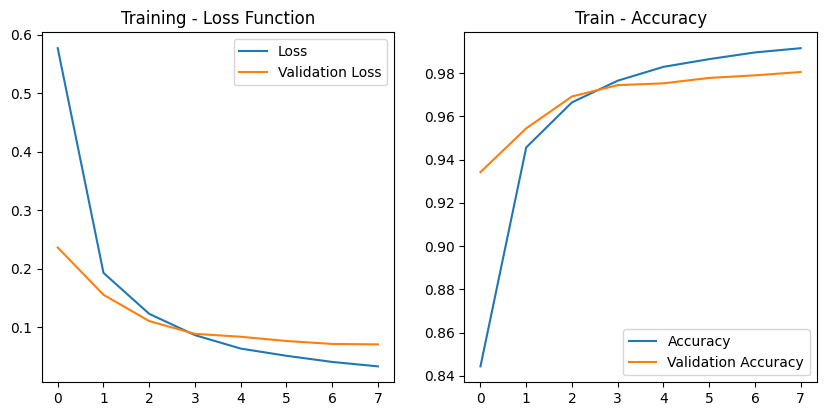

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [17]:
model.save('modail.h5')

In [18]:
new_model = tf.keras.models.load_model('modail.h5')

# new_model.summary()

parti streamlit

In [19]:
import cv2

img = cv2.imread("test.png",cv2.IMREAD_GRAYSCALE)

In [20]:
#2eme technique
# from PIL import Image

# im = np.array(Image.open("test.png").convert('L'))

In [21]:
resized = cv2.resize(img, (28,28)).astype('float32').reshape(1,28,28,1)/255

In [22]:
y_pred = new_model.predict(resized)

1/1 [==============================] - 0s 174ms/step


In [23]:
np.round(y_pred,3)*100

array([[ 0.      ,  0.      , 98.299995,  1.7     ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ]], dtype=float32)

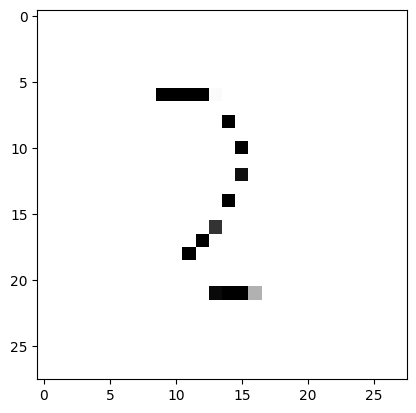

In [24]:
plt.imshow(resized[0],cmap='gray')

In [27]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
np.random.randint(28000)

19267

In [192]:
testi = np.array(test.sample(n=1, random_state=np.random.randint(28000)), dtype='float32')/255

In [193]:
testi = testi.reshape(testi.shape[0],*(28,28,1))

In [194]:
pred = new_model.predict(testi)

1/1 [==============================] - 0s 24ms/step


In [195]:
pred = np.round(pred,3)*100

In [196]:
pred = pd.DataFrame(pred).T.idxmax()

In [197]:
pred[0]

7